Please, fill the code cells to complete the project.

In our assessment of your application, we will consider your ability to code but also how you communicate your results. 

Clean python code doesn't need to be extensively documented, however we encourage the use of _Markdown_ cells to guide us through your reasoning.

## About the data
You will find some `csv` files on the `data` directory. Each file contains the acceleration measured for each skating stride during a hockey game.

Here is a sample of a data file:

<table><tr><th># OpenField Export : 19/09/2017 4:52:54 PM</th><th></th><th></th><th></th><th></th></tr><tr><td># Reference time : 04/01/2017 4:02:00 PM UTC</td><td></td><td></td><td></td><td></td></tr><tr><td># CentisecTime : 148354572000</td><td></td><td></td><td></td><td></td></tr><tr><td># DeviceId : 896</td><td></td><td></td><td></td><td></td></tr><tr><td># Speed Units : Meters Per Second</td><td></td><td></td><td></td><td></td></tr><tr><td># Distance Units : Meters</td><td></td><td></td><td></td><td></td></tr><tr><td>Period</td><td>Ticks</td><td>Timestamp</td><td>Hockey Stride Direction</td><td>Hockey Stride Accel</td></tr><tr><td>1 ST</td><td>0</td><td>00:00:00.000</td><td>0</td><td>0</td></tr><tr><td>1 ST</td><td>1</td><td>00:00:00.010</td><td>0</td><td>0</td></tr><tr><td>1 ST</td><td>2</td><td>00:00:00.020</td><td>0</td><td>0</td></tr></table>

Where:
- `Period`: the label associated with the current period
- `Ticks`: the frame of the current row
- `Timestamp`: the timestamp of the current row
- `Hockey Stride Direction`: whether it is a right or left skating stride ($\text{left} = 4$ & $\text{right} = 10$)
- `Hockey Stride Accel`: 1-D acceleration of the current skating stride

## 1. Get the data
Write a reusable function to read each file. As you may have noticed, there are many zeros in each file. We recommend that you discard it for further analysis.

Creation of the function import_player_data that import player data and remove the zeros.
Then we import the data of each player.

In [2]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import datetime

#Create a function to import player data
def import_player_data(player):
    
    #Github url with player data
    url = 'https://raw.githubusercontent.com/Patricebrochubeaudry/show-me-your-code/master/data/'
    player = pd.read_csv(url+player, engine='python',error_bad_lines=False,skiprows=6)
    
    #Only keep  the strides
    player = player[(player['Hockey Stride Accel']!=0) | (player['Hockey Stride Direction']!=0)]
    return player

#Use the function to import the data of each player
player_1 = import_player_data("player_1.csv")
player_2 = import_player_data("player_2.csv")
player_3 = import_player_data("player_3.csv")
player_4 = import_player_data("player_4.csv")
player_5 = import_player_data("player_5.csv")

#Test
player_1

,Period,Ticks,Timestamp,Hockey Stride Direction,Hockey Stride Accel
8551,1 ST,8551,00:01:25.510,4,1.397918
8563,1 ST,8563,00:01:25.630,10,1.166986
8614,1 ST,8614,00:01:26.140,10,0.709474
8636,1 ST,8636,00:01:26.360,4,1.107262
8665,1 ST,8665,00:01:26.650,10,1.479432
8714,1 ST,8714,00:01:27.140,4,1.252466
8741,1 ST,8741,00:01:27.410,10,0.889530
8769,1 ST,8769,00:01:27.690,4,1.845100
8799,1 ST,8799,00:01:27.990,10,1.669497
8853,1 ST,8853,00:01:28.530,4,1.013210


## 2. Build some features
Given the data you previously loaded, implement a function to determine the different shifts of each player (time on-ice).

_Hint: you can consider a shift when more than thirty seconds separate two accelerations._

Creation of the function shifts that transform the player data to determine the shifts.

Then, build three informative features. We recommend to get started with metrics related to (1) the volume, (2) the intensity and (3) the left-right asymmetry associated with each shift.

Creation of the function create_shifts that transform the player data to create shift summaries.

Where:
- `Timedelta`: Time since last stride
- `Shift`: Shift number calculated on a 30s timedelta


In [4]:
#Function that calculate the time between strides and identify each shift on the player data
def shifts(player):
    player["Timestamp"] = pd.to_datetime(player['Timestamp'])
    player["Timedelta"] = player['Timestamp'] - player['Timestamp'].shift()
    player["Shift"] = (player["Timedelta"]>'00:00:30.000000').cumsum() + 1
    player['Timedelta'] = player['Timedelta'].values.astype(np.int64)
    player["Timedelta"].iloc[0] = '0'
    return 

#Use the function to create shifts for each player on the player data
shifts(player_1)
shifts(player_2)
shifts(player_3)
shifts(player_4)
shifts(player_5)

#Test
player_5

,Period,Ticks,Timestamp,Hockey Stride Direction,Hockey Stride Accel,Timedelta,Shift
3244,1 ST,3244,2019-05-19 00:00:32.440,10,2.403026,0,1
3277,1 ST,3277,2019-05-19 00:00:32.770,4,1.399032,330000000,1
4391,1 ST,4391,2019-05-19 00:00:43.910,4,0.756680,11140000000,1
4406,1 ST,4406,2019-05-19 00:00:44.060,10,1.121922,150000000,1
4469,1 ST,4469,2019-05-19 00:00:44.690,10,1.968402,630000000,1
4506,1 ST,4506,2019-05-19 00:00:45.060,4,1.346416,370000000,1
4534,1 ST,4534,2019-05-19 00:00:45.340,10,1.339257,280000000,1
4642,1 ST,4642,2019-05-19 00:00:46.420,10,0.933976,1080000000,1
4687,1 ST,4687,2019-05-19 00:00:46.870,4,1.125683,450000000,1
4738,1 ST,4738,2019-05-19 00:00:47.380,10,0.891332,510000000,1


Creation of the function shifts_summary that summarize each shifts with information.

Where:
- `Shift_Number`: the number of a shift (1st shift = 1)
- `Shift_Length`: the duration in time of a shift
- `Number_of_strides`: the number of strides in a shift
- `Intensity_avg`: the average intensity of each Hockey Stride Accel in a shift
- `Intensity_total`: the sum of the intensity of each Hockey Stride Accel in a shift
- `Asymmetry`: the average of Hockey Stride Direction in a shift (7 is if there are as many stride on both side, the closer to 4 the more left leaning and the closer to 10 right leaning)
- `Left_Strides`: the number of left strides in a shift
- `Right_Strides`: the number of right strides in a shift

In [157]:
#Function that create summarize information/card on each shift
def shifts_summary(player):
    #Extract certain pertinent variable, drop non pertinent one and rename them 
    Shifts_player = player.groupby(("Shift")).mean()
    Shifts_player = Shifts_player.drop(columns=['Ticks'])
    Shifts_player = Shifts_player.rename(columns = {'Hockey Stride Direction':'Asymmetry'})
    Shifts_player = Shifts_player.rename(columns = {'Hockey Stride Accel':'Intensity_avg'})
    #Create new variables Intensity_toal and Number_of_strides
    Shifts_player['Intensity_total'] = player.groupby('Shift').sum()[['Hockey Stride Accel']]
    Shifts_player['Number_of_strides'] = player.groupby('Shift').count()[['Hockey Stride Direction']]
    #Count for left & right strides and fill the ones that only have strides from one side
    Shifts_player['Left_Strides'] = player[player["Hockey Stride Direction"]==4].groupby('Shift').count()[['Hockey Stride Direction']]
    Shifts_player['Right_Strides'] = player[player["Hockey Stride Direction"]==10].groupby('Shift').count()[['Hockey Stride Direction']]
    Shifts_player['Left_Strides'] = Shifts_player['Left_Strides'].fillna(0)
    Shifts_player['Right_Strides'] = Shifts_player['Right_Strides'].fillna(0)
    #Calculate the shift length with the difference between the max and min Timestamp from each shift
    Shifts_player['Shift_Length'] = player.groupby('Shift').max()[['Timestamp']]-player.groupby('Shift').min()[['Timestamp']]
    #Create Period
    Shifts_player["Period"] = player.groupby("Shift").first()[['Period']]
    #Position the shift number as index
    Shifts_player['Shift_Number'] = Shifts_player.index
    #Position the columns in a new order
    Shifts_player = Shifts_player[['Period','Shift_Number','Shift_Length','Number_of_strides','Intensity_avg','Intensity_total','Asymmetry','Left_Strides','Right_Strides']]

    return Shifts_player
 
#Create a summarize information/card for the shifts of each player
Shifts_player_1 = shifts_summary(player_1)
Shifts_player_2 = shifts_summary(player_2)
Shifts_player_3 = shifts_summary(player_3)
Shifts_player_4 = shifts_summary(player_4)
Shifts_player_5 = shifts_summary(player_5)

#Test
Shifts_player_2

,Period,Shift_Number,Shift_Length,Number_of_strides,Intensity_avg,Intensity_total,Asymmetry,Left_Strides,Right_Strides
Shift,,,,,,,,,
1,1 ST,1,00:00:12.470000,5,1.060122,5.300612,5.200000,4.0,1.0
2,1 ST,2,00:00:03.830000,5,1.240433,6.202164,6.400000,3.0,2.0
3,1 ST,3,00:00:33.110000,6,1.157785,6.946710,8.000000,2.0,4.0
4,1 ST,4,00:00:03.890000,13,1.242269,16.149491,6.769231,7.0,6.0
5,1 ST,5,00:00:19.420000,17,1.088337,18.501735,6.823529,9.0,8.0
6,1 ST,6,00:00:00.610000,2,1.039418,2.078837,4.000000,2.0,0.0
7,1 ST,7,00:00:00.740000,2,1.038562,2.077123,10.000000,0.0,2.0
8,1 ST,8,00:00:00.300000,2,0.745173,1.490347,7.000000,1.0,1.0
9,1 ST,9,00:00:00.940000,3,0.923503,2.770510,8.000000,1.0,2.0


## 3. Explore the data
From the three variables previously computed, create the following figures:

1. show the distribution of each variable
2. compare the mean and standard deviation for each participant
3. compare the first, second and third periods
4. show the correlation matrix between each variable
5. show a regression model fitted between your volume and intensity variables

Creation of an histogram for each player to see the distribution in their number of strides.

The histograms are in order from player_1 to player_5 for all the variables.

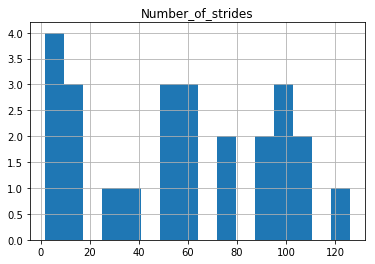

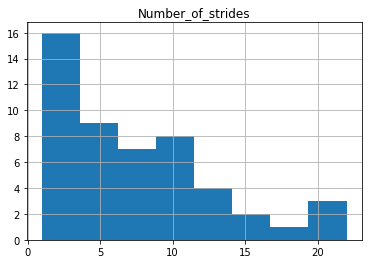

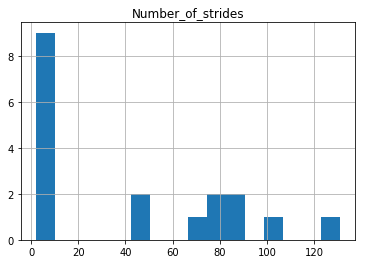

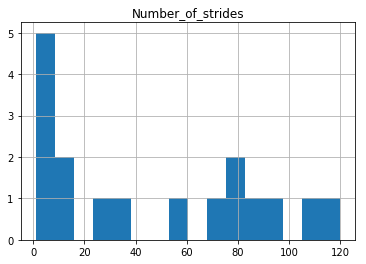

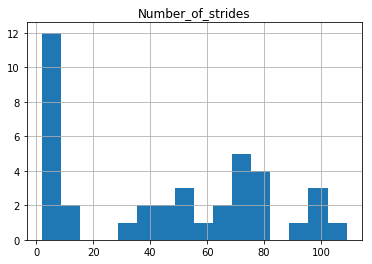

In [158]:
Stride_histogram_player_1 = Shifts_player_1.hist(column='Number_of_strides', bins = 16)
Stride_histogram_player_2 = Shifts_player_2.hist(column='Number_of_strides', bins = 8)
Stride_histogram_player_3 = Shifts_player_3.hist(column='Number_of_strides', bins = 16)
Stride_histogram_player_4 = Shifts_player_4.hist(column='Number_of_strides', bins = 16)
Stride_histogram_player_5 = Shifts_player_5.hist(column='Number_of_strides', bins = 16)

Creation of an histogram for each player to see the distribution in their Intensity_total.

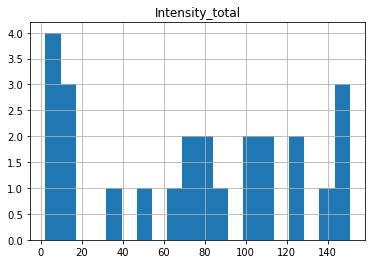

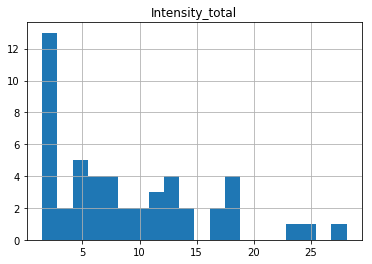

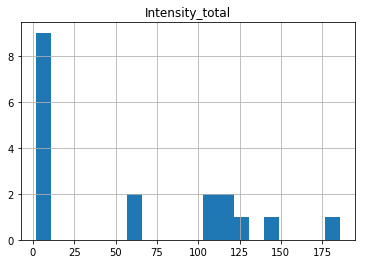

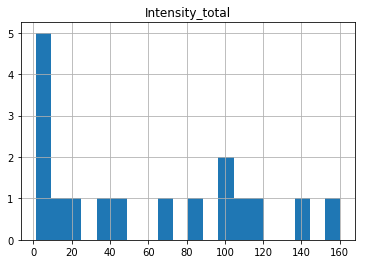

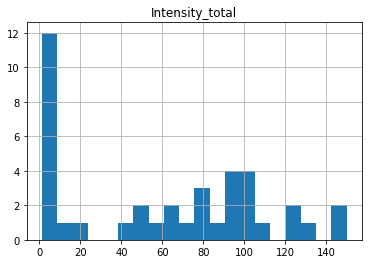

In [7]:
Intensity_histogram_player_1 = Shifts_player_1.hist(column='Intensity_total', bins = 20)
Intensity_histogram_player_2 = Shifts_player_2.hist(column='Intensity_total', bins = 20)
Intensity_histogram_player_3 = Shifts_player_3.hist(column='Intensity_total', bins = 20)
Intensity_histogram_player_4 = Shifts_player_4.hist(column='Intensity_total', bins = 20)
Intensity_histogram_player_5 = Shifts_player_5.hist(column='Intensity_total', bins = 20)

Creation of an histogram for each player to see the distribution in their Asymmetry.

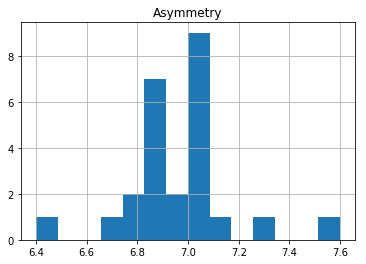

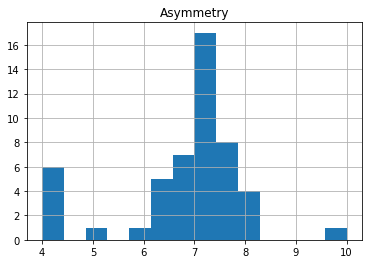

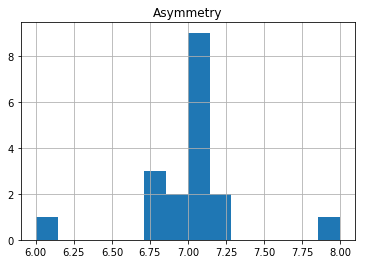

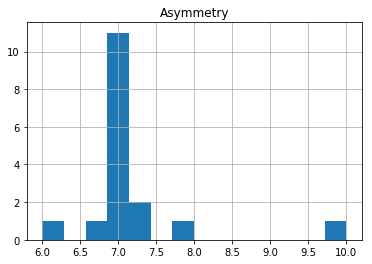

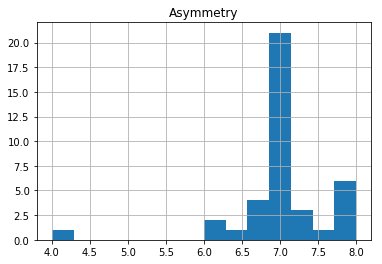

In [8]:
Asymmetry_histogram_player_1 = Shifts_player_1.hist(column='Asymmetry', bins = 14)
Asymmetry_histogram_player_2 = Shifts_player_2.hist(column='Asymmetry', bins = 14)
Asymmetry_histogram_player_3 = Shifts_player_3.hist(column='Asymmetry', bins = 14)
Asymmetry_histogram_player_4 = Shifts_player_4.hist(column='Asymmetry', bins = 14)
Asymmetry_histogram_player_5 = Shifts_player_5.hist(column='Asymmetry', bins = 14)

2. compare the mean and standard deviation for each participant

Creation of All_Stats to compare the mean and standard deviation for each participant for the variable we selected.

In [159]:
#Calculate the average and standard deviation
Stats_player_1 = Shifts_player_1[['Number_of_strides','Intensity_total','Asymmetry']].describe().loc[['mean','std']] 
Stats_player_2 = Shifts_player_2[['Number_of_strides','Intensity_total','Asymmetry']].describe().loc[['mean','std']] 
Stats_player_3 = Shifts_player_3[['Number_of_strides','Intensity_total','Asymmetry']].describe().loc[['mean','std']] 
Stats_player_4 = Shifts_player_4[['Number_of_strides','Intensity_total','Asymmetry']].describe().loc[['mean','std']] 
Stats_player_5 = Shifts_player_5[['Number_of_strides','Intensity_total','Asymmetry']].describe().loc[['mean','std']]

#Join all the stats
All_Stats = pd.concat([Stats_player_1,Stats_player_2,Stats_player_3,Stats_player_4,Stats_player_5],keys=['Player_1', 'Player_2','Player_3','Player_4','Player_5'])
All_Stats

Number_of_strides  Intensity_total  Asymmetry
Player_1 mean          56.880000        74.352971   6.956625
         std           39.263342        51.547412   0.211077
Player_2 mean           7.540000         8.921816   6.739906
         std            5.518836         6.745871   1.229077
Player_3 mean          41.833333        58.926478   6.987588
         std           44.099153        63.352550   0.362398
Player_4 mean          47.235294        60.163670   7.159133
         std           40.996234        52.996693   0.803115
Player_5 mean          45.256410        60.566592   7.004726
         std           35.682605        48.343242   0.689728

The player_1 has the highest average number of stride and intensity.

The player_2 has low average and standard deviation numbers for number of strides and intensity levels compare to other players. He has the most tendancy to use his left foot (because Asymmetry under 7 and closer to 4 than all others).  

The player 4 uses more his right foot than his left which is unique compare to other players in this dataset (because Asymmetry under 7 and closer to 4 than all others).

Player_3, Player_4 and Player_5 are similar in their total intensity but some may take more strides than other to achieve it. 

3. compare the first, second and third periods

Creation of All_Shifts to combine all the shifts together to help create Period_Summary.

Creation of Period_Summary which show the summaries for the first, second and third periods.

In [161]:
#Put all the shifts together
All_Shifts = pd.concat([Shifts_player_1,Shifts_player_2,Shifts_player_3,Shifts_player_4,Shifts_player_5])

#Create the Period_Summary by building new variables from all the shifts groupped by period
Period_Summary = All_Shifts.groupby('Period').count()[['Shift_Number']]
Period_Summary['Total_Number_of_strides'] = All_Shifts.groupby('Period').sum()[['Number_of_strides']]
Period_Summary['Average_Number_of_strides'] = All_Shifts.groupby('Period').mean()[['Number_of_strides']]
Period_Summary['Intensity_total'] = All_Shifts.groupby('Period').sum()[['Intensity_total']]
Period_Summary['Intensity_avg'] = All_Shifts.groupby('Period').mean()[['Intensity_avg']]
Period_Summary['Asymmetry'] = All_Shifts.groupby('Period').mean()[['Asymmetry']]
Period_Summary['Left_Strides'] = All_Shifts.groupby('Period').sum()[['Left_Strides']]
Period_Summary['Right_Strides'] = All_Shifts.groupby('Period').sum()[['Right_Strides']]
Period_Summary = Period_Summary.rename(columns = {'Shift_Number':'Number_of_shifts'})

#Test
Period_Summary

,Number_of_shifts,Total_Number_of_strides,Average_Number_of_strides,Intensity_total,Intensity_avg,Asymmetry,Left_Strides,Right_Strides
Period,,,,,,,,
1 ST,43,1754,40.790698,2346.497648,1.255049,6.952329,883.0,871.0
2 ND,40,1544,38.600000,2009.764476,1.229273,6.802636,797.0,747.0
3 RD,40,1705,42.625000,2264.105024,1.309825,6.806073,852.0,853.0


The third period had more average strides and intensity per shift than the first who had more than the second.

The second period had more left stride than right stride while the other two periods were closer both feet being use equally.

4. show the correlation matrix between each variable

Creation of a correlation map between the variable.

In [154]:
#See the correlation between the variable
corr = Period_Summary.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Number_of_shifts,Total_Number_of_strides,Average_Number_of_strides,Intensity_total,Intensity_avg,Asymmetry,Left_Strides,Right_Strides
Number_of_shifts,1,0.681,0.0511,0.689,-0.204,1,0.775,0.612
Total_Number_of_strides,0.681,1,0.767,1,0.579,0.695,0.99,0.996
Average_Number_of_strides,0.0511,0.767,1,0.759,0.967,0.0711,0.67,0.821
Intensity_total,0.689,1,0.759,1,0.569,0.704,0.992,0.995
Intensity_avg,-0.204,0.579,0.967,0.569,1,-0.184,0.46,0.65
Asymmetry,1,0.695,0.0711,0.704,-0.184,1,0.788,0.628
Left_Strides,0.775,0.99,0.67,0.992,0.46,0.788,1,0.974
Right_Strides,0.612,0.996,0.821,0.995,0.65,0.628,0.974,1


The correlation matrix show the high correlation between the number of strides and the intensity in multiple ways because there are multiple correlation between number of strides variables and intensity variables.

5. show a regression model fitted between your volume and intensity variables

Creation of a regression model fitted between the Number_of_strides and Intensity_total.

Intercept: 
 [-0.98968906]
Coefficients: 
 [[1.35366766]]
Mean squared error: 23.69
Variance score: 0.990


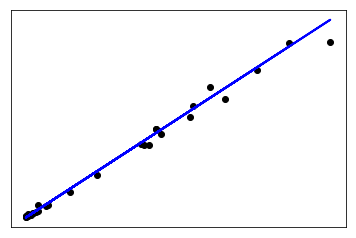

In [164]:
#Extract the column needed for the regression model
Intensity_total = All_Shifts['Intensity_total']
Number_of_strides = All_Shifts['Number_of_strides']
Intensity_avg = All_Shifts['Asymmetry']

#Reshape them into array for the linear regression
y = np.array(Intensity_total).reshape(-1, 1) 
x = np.array(Number_of_strides).reshape(-1, 1) 

#Split the dataset into test and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

#Fit the linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

#Make predictions using the testing set
y_pred = reg.predict(x_test)

#Print the Intercept, Coefficient and metrics
from sklearn.metrics import mean_squared_error, r2_score
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('Variance score: %.3f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()


The regression model between the total intensity and the number of strides has 99.0% variance explained where the formula is Total_intensity = -0.9897 + 1.3537*Number_of_strides.

## 4. Statistical inferences

Test if there is a significant difference between the periods on your intensity variable.

We test the total intensity and average intensity for significant difference between the periods.

In [12]:
from scipy.stats import ttest_ind

#Extract data for each period
Period1 = All_Shifts[All_Shifts['Period']=='1 ST']
Period2 = All_Shifts[All_Shifts['Period']=='2 ND']
Period3 = All_Shifts[All_Shifts['Period']=='3 RD']

#Create a ttest for each pair of period for the two intensity variables
ttest_ind(Period1['Intensity_total'], Period2['Intensity_total'])

Ttest_indResult(statistic=0.4060478956598051, pvalue=0.685778120221189)

In [60]:
ttest_ind(Period2['Intensity_total'], Period3['Intensity_total'])

Ttest_indResult(statistic=-0.5291682107935635, pvalue=0.5981915473854954)

In [61]:
ttest_ind(Period1['Intensity_total'], Period3['Intensity_total'])

Ttest_indResult(statistic=-0.176637572945455, pvalue=0.8602339896530664)

In [63]:
ttest_ind(Period1['Intensity_avg'], Period2['Intensity_avg'])

Ttest_indResult(statistic=0.6608691062247368, pvalue=0.5105715553675952)

In [64]:
ttest_ind(Period1['Intensity_avg'], Period3['Intensity_avg'])

Ttest_indResult(statistic=-1.4205349596553372, pvalue=0.15929000823518194)

In [65]:
ttest_ind(Period2['Intensity_avg'], Period3['Intensity_avg'])

Ttest_indResult(statistic=-2.1992122770284563, pvalue=0.030825095392183057)

There is a significant difference between the period 2 and 3 on the intensity average variable where the pvalue=0.03 which is under 0.05.

All the other difference between periods were not significant because the pvalue was over 0.05.

## 5. Predictive analysis

Using your three variables (volume, intensity and asymmetry) and a simple model, predict the duration of the shifts.
You can aim for a relative error of about 20% on your test set.

We take the number of strides, the average intensity and the asymmetry to predict the shift length with a linear regression.

In [165]:
#Extract the columns needed for the regression model
Regression_Columns = All_Shifts[['Number_of_strides','Intensity_total','Asymmetry','Shift_Length','Period']]

#To drop the shift during the intermissions
Regression_Columns = Regression_Columns.dropna()

#Only keep data where there shift are 20 seconds and higher to help the prediction accuracy (later model should modify this)
Regression_Columns = Regression_Columns[Regression_Columns.Shift_Length > '00:00:20.000000'] 

#Prepare the X variables
X_variables = Regression_Columns[['Number_of_strides','Intensity_total','Asymmetry']]
X_variables = X_variables.reset_index(drop=True)

#Prepare the Y variable
Y_variable = Regression_Columns['Shift_Length']
Y_variable = Y_variable.reset_index(drop=True)
Y_variable = Y_variable.astype(np.int64)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_variables, Y_variable, test_size=0.2,random_state=2)

#Fit the linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)

#Make Predictions
y_predicted = reg.predict(X_test)

#Transform the data types to be the same to calculate the differences
y_predicted = (y_predicted).astype(np.int64)
y_predicted = pd.Series(y_predicted)
y_test = y_test.reset_index(drop=True)

#Calculate the difference and absolute difference for each prediction
Diff = y_test-y_predicted
abs_diff = abs(Diff)

#Calculate the relative error
Relative_error = (100*(abs_diff/y_test))
Relative_error = Relative_error.mean()
print(Relative_error)


18.671847511839687


The relative error is about 18.67% which is just under the 20% that we aimed for. The asymettry variable currently make the relative error go up. By removing it, we get a slightly better result which shows that the asymettry variable could be constructed in a more efficient way to capture value and information.

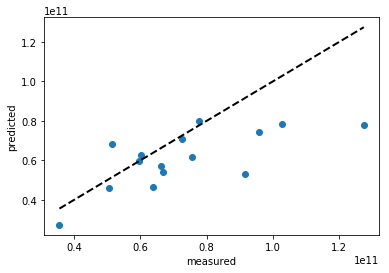

In [150]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

This graph shows that the current algorithm using the number of strides, the average intensity and the asymmetry to predict the shift length with a linear regression does not well represent the real distribution. To improve the accuracy of the model, different type of distribution and fit must be tested. We have removed the shorter shifts to improve the model accuracy but it seems to have more difficulties making right predictions the longer the shift is. Also, the use of a bigger dataset (more players for example) should make the algorithm  better.